author: Alptekin Orbay

# Dostoyevsky Novels Latent Semantic Analysis

## Preprocessing and Corpus Preparation

In [103]:
%matplotlib inline
import nltk
import string
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
import numpy as np

root_dir = 'SheakspearDS'
token_dict = {}
stemmer = PorterStemmer()
f_list = []

def stem_tokens(tokens, stemmer):
    stemmed = []
    regex = re.compile('[^a-zA-Z]')
    for item in tokens:
        item = regex.sub('', item)
        #stemmed.append(stemmer.stem(item))        
        stemmed.append(item)
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

for file in os.listdir(root_dir):
        if file.endswith(".txt"):
            file_path = root_dir + '/' + file
            f = open(file_path, 'r')
            print(file)
            text = f.read()
            f.close()
            print('Closed')
            lowers = text.lower()
            no_punctuation = lowers.translate(string.punctuation)
            token_dict[file] = no_punctuation
            f_list.append(file)
T = len(f_list)

king_lear.txt
Closed
merchant_of_venice.txt
Closed
othello.txt
Closed
RomeoAndJuliet.txt
Closed
macbeth.txt
Closed
hamlet.txt
Closed


## Creating Document - Terms TF IDF Matrix
$TF$: Term Frequency  
$IDF$: Inverse Document Frequency  
$V$ = Vocablary Size  
$D$ = Total Number of Documents  
$TFIDF$ resulting matrix $V$ by $D$.
$$
TF(i, j) = \frac{t_{ij}}{\sum_{i=0}^{V}t_{ij}} \\
IDF(i) = \ln\left(\frac{D}{\sum_{j=0}^{D}t_i \in d_j} \right) \\
TFIDF(i,j) = TF(i, j) * IDF(i)
$$

In [104]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())
feature_names = tfidf.get_feature_names()
print('Matrix Created.')

Matrix Created.


## SVD
$$ A_{VxD} = U_{VxV}  \Sigma_{VxD}   V_{DxD}^* $$
## Reduced SVD
\begin{align}
A_{VxD} &= U_{VxD}  \Sigma_{DxD}   V_{DxD}^* \\ 
A &= U \Sigma V^* \\ 
A V &= U \Sigma \\
A v_i &= u_i * \sigma_i \\
\end{align}
### Low Rank Approximations
\begin{align}
\sigma_1 > \sigma_2 &> ... > \sigma_r \\
A_k &= \sum_{i=1}^{k}\sigma_i u_i v_i^* \\
A_k = A_{VxD} &= U_{Vxk}  \Sigma_{kxk}   V_{kxD}^* \\
\min\|A - A_k \|_2 &= \sigma_{k+1}\\
A - A_k  &=\sum_{i=k+1}^{r}\sigma_i u_i v_i^* \\
\end{align}
## Example

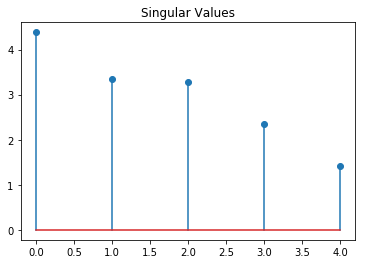

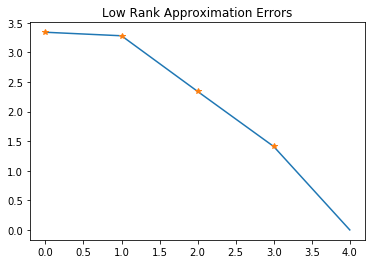

[  3.34048088e+00   3.28086490e+00   2.34051394e+00   1.41009813e+00
   2.56214934e-15]


In [105]:
import numpy as np
Sz = 5
A = np.random.randn(Sz*2,Sz)
U, S_1, V = np.linalg.svd(A, full_matrices=False)
plt.figure(0);
plt.stem(S_1);
plt.title('Singular Values')
S = np.diag(S_1)
plt.figure(1)
app = np.zeros(Sz)
for i in range(Sz):
    V_t =V[0:i+1,:]
    A_i = np.dot(np.dot(U[:,0:i+1],S[0:i+1,0:i+1] ),V_t)
    app[i] = np.linalg.norm(A-A_i,2);
plt.plot(app)
plt.plot(S_1[1:Sz+1],'*')
plt.title('Low Rank Approximation Errors')
plt.show()
print(app)

SVD is done.


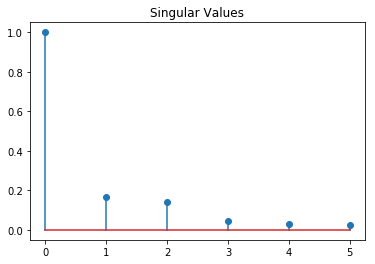

In [106]:
matrix = tfs.toarray()
U, s, V = np.linalg.svd(matrix, full_matrices=False)
print('SVD is done.')
plt.figure(2);
plt.stem(s/max(s));
plt.title('Singular Values')

## Plotting Latent Features

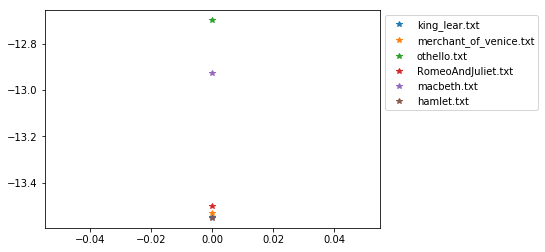

In [110]:
plt.figure(3)
U = np.dot(U, np.diag(s))
a = U[:,0:2]
for i in range(T):
    d = np.sqrt(a[i,0]*a[i,0] + a[i,1]*a[i,1])
    plt.plot(a[i,0],'*',label=f_list[i])
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.show()